#### Author: Pranshu Kumar Premi

## Pocket Gems Take Home Assignment

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

In [2]:
#reading user data
gem1 = pd.read_csv('P:/Pocket Gems/iaps.csv')
gem2 = pd.read_csv('P:/Pocket Gems/sessions.csv')
gem3 = pd.read_csv('P:/Pocket Gems/spendevents.csv')
gem4 = pd.read_csv('P:/Pocket Gems/users.csv')

### Gem1 Data set

In [3]:
#fetching rows
gem1.head()

,user_id,ts,date,prod_name,prod_type,rev
0,7480,2019-03-04 08:15:49,2019-03-04,iap_1_gems_2,gems,760
1,7480,2019-03-04 08:24:15,2019-03-04,iap_1_passes_2,chapterPasses,760
2,7480,2019-03-04 22:49:08,2019-03-04,iap_1_gems_1,gems,410
3,2466,2019-03-06 00:16:48,2019-03-06,iap_1_gems_2,gems,760
4,22001,2019-03-06 09:13:45,2019-03-06,iap_1_gems_2,gems,760


In [4]:
#data dimensions
gem1.shape

(6685, 6)

In [5]:
#checking spentypes with negative amount
gem3[gem3['amount'] < 0].groupby('spendtype').sum()

,user_id,chapter,amount
spendtype,,,
IAP,56116120,41509,-611197
earnGemsCounter,548201459,166896,-45843758
valuepack,332762,482,-8463


In [6]:
#gem1 data types
gem1.dtypes

user_id       int64
ts           object
date         object
prod_name    object
prod_type    object
rev           int64
dtype: object

In [7]:
#gem1 data information
gem1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685 entries, 0 to 6684
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    6685 non-null   int64 
 1   ts         6685 non-null   object
 2   date       6685 non-null   object
 3   prod_name  6685 non-null   object
 4   prod_type  6685 non-null   object
 5   rev        6685 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 313.5+ KB


In [8]:
#Product types
gem1['prod_type'].value_counts()

gems             4573
chapterPasses    2029
valuePack          83
Name: prod_type, dtype: int64

In [9]:
#number of users
gem1['user_id'].nunique()

1526

In [10]:
#list of Product names with counts
gem1['prod_name'].value_counts()

iap_1_gems_2          2599
iap_1_passes_2        1064
iap_1_gems_5           976
iap_1_gems_1           693
iap_1_passes_1         576
iap_1_gems_10          231
iap_1_passes_5         226
iap_1_passes_10        163
iap_1_gems_20           69
iap_value_pack_004      46
iap_value_pack_008      13
iap_value_pack_001      12
iap_value_pack_005       5
iap_value_pack_010       3
iap_1_gems_50            3
iap_1_gems_100           2
iap_value_pack_003       2
iap_value_pack_009       1
iap_value_pack_007       1
Name: prod_name, dtype: int64

In [11]:
#highest revenue collected
gem1['rev'].max()

35060

In [12]:
#lowest revenue collected
gem1['rev'].min()

410

In [13]:
#checking missing values
gem1.isnull().sum()

user_id      0
ts           0
date         0
prod_name    0
prod_type    0
rev          0
dtype: int64

In [14]:
#data summary
gem1.describe()

,user_id,rev
count,6685.000000,6685.000000
mean,11374.928347,1141.134630
std,6509.850178,1201.682124
min,2.000000,410.000000
25%,6338.000000,760.000000
50%,11351.000000,760.000000
75%,16510.000000,1810.000000
max,22569.000000,35060.000000


### 'Gem2' dataset

In [15]:
#fetching 'gem2' rows
gem2.head()

,user_id,ts,date,session_num,last_session_termination_type
0,14067,2019-03-01 00:06:50,2019-03-01,1,NaN
1,14067,2019-03-01 00:22:27,2019-03-01,2,NaN
2,16275,2019-03-01 01:23:03,2019-03-01,1,NaN
3,16275,2019-03-01 01:31:16,2019-03-01,2,NaN
4,16275,2019-03-01 01:47:22,2019-03-01,3,NaN


In [16]:
#'gem2' dimensions
gem2.shape

(722955, 5)

In [17]:
#gem2 columns' datatypes
gem2.dtypes

user_id                            int64
ts                                object
date                              object
session_num                        int64
last_session_termination_type    float64
dtype: object

In [18]:
# gem2 data infomration
gem2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722955 entries, 0 to 722954
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        722955 non-null  int64  
 1   ts                             722955 non-null  object 
 2   date                           722955 non-null  object 
 3   session_num                    722955 non-null  int64  
 4   last_session_termination_type  0 non-null       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 27.6+ MB


In [19]:
#checking for null values
gem2.isnull().sum()

user_id                               0
ts                                    0
date                                  0
session_num                           0
last_session_termination_type    722955
dtype: int64

In [20]:
#dropping column with only missing values
gem2 = gem2.drop('last_session_termination_type', axis = 1)

### 'Gem3' Data

In [21]:
#fetching rows
gem3.head()

,user_id,ts,date,story,chapter,spendtype,currency,amount
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0,earnGemsCounter,gems,-22
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0,earnGemsCounter,gems,-22


In [22]:
#'gem3' data dimensions
gem3.shape

(107764, 8)

In [23]:
#Gem3 data information
gem3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107764 entries, 0 to 107763
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    107764 non-null  int64 
 1   ts         107764 non-null  object
 2   date       107764 non-null  object
 3   story      107764 non-null  object
 4   chapter    107764 non-null  int64 
 5   spendtype  106420 non-null  object
 6   currency   107764 non-null  object
 7   amount     107764 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 6.6+ MB


In [24]:
#checking datatypes
gem3.dtypes

user_id       int64
ts           object
date         object
story        object
chapter       int64
spendtype    object
currency     object
amount        int64
dtype: object

In [25]:
#user id 2062's spending summary
gem3[gem3['user_id'] == 2062].sort_values(by = 'ts', ascending = False)

,user_id,ts,date,story,chapter,spendtype,currency,amount
15726,2062,2019-03-03 04:24:58,2019-03-03,story_1,8,premiumChoice,gems,27
15725,2062,2019-03-03 04:07:37,2019-03-03,story_1,6,premiumChoice,gems,55
15724,2062,2019-03-03 04:07:34,2019-03-03,story_1,6,IAP,gems,-73
15723,2062,2019-03-03 03:51:00,2019-03-03,story_1,5,premiumChoice,gems,64
15722,2062,2019-03-03 03:50:58,2019-03-03,story_1,5,IAP,gems,-73
15721,2062,2019-03-03 03:50:45,2019-03-03,story_1,5,IAP,gems,-73
15694,2062,2019-03-02 20:01:22,2019-03-03,story_1,0,earnGemsCounter,gems,-22


In [26]:
#number of users spending Gems
gem3[gem3['spendtype'] == 'premiumChoice']['user_id'].nunique()

4148

In [27]:
#number of users earning Gems
gem3[gem3['spendtype'] == 'earnGemsCounter']['user_id'].nunique()

17996

In [28]:
#number of users purchasing Gems
gem3[gem3['spendtype'] == 'IAP']['user_id'].nunique()

1181

In [29]:
#users distribution across spendtypes
gem3['spendtype'].value_counts()

earnGemsCounter    87235
premiumChoice      14231
IAP                 4915
valuepack             39
Name: spendtype, dtype: int64

In [30]:
#Checking effect of users choosing 'valuepack' on 'amount'
gem3[gem3['spendtype'] == 'valuepack'][gem3['amount'] >= 0]

<ipython-input-30-7aba53f27429>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gem3[gem3['spendtype'] == 'valuepack'][gem3['amount'] >= 0]


,user_id,ts,date,story,chapter,spendtype,currency,amount


In [31]:
#checking effect of users choosing 'premiumChoice' on 'amount'
gem3[gem3['spendtype'] == 'premiumChoice'][gem3['amount'] <= 0]

<ipython-input-31-838bf0f8e1a9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gem3[gem3['spendtype'] == 'premiumChoice'][gem3['amount'] <= 0]


,user_id,ts,date,story,chapter,spendtype,currency,amount


In [32]:
gem3.isnull().sum()

user_id         0
ts              0
date            0
story           0
chapter         0
spendtype    1344
currency        0
amount          0
dtype: int64

Since, we have less than 1% data that contains missing values, we opt to drop these rows.

In [33]:
#dropping rows with null values
gem3.dropna(axis=0, inplace = True)

### 'Gem4' data

In [34]:
#fetching rows
gem4.head()

,user_id,install_date,lang,country,hw_ver,os_ver
0,0,2019-03-01,en,US,"iPhone4,1",9.1
1,1,2019-03-01,en,IN,"iPod5,1",8.1.2
2,2,2019-03-06,en,US,"iPod7,1",8.4.1
3,3,2019-03-03,nb,NO,"iPhone8,1",9.2.1
4,4,2019-03-03,en,GB,"iPhone5,4",9.2.1


In [35]:
#checking data dimensions
gem4.shape

(22576, 6)

In [36]:
#data information
gem4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       22576 non-null  int64 
 1   install_date  22576 non-null  object
 2   lang          22576 non-null  object
 3   country       22564 non-null  object
 4   hw_ver        22576 non-null  object
 5   os_ver        22576 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [37]:
#checking datatypes
gem4.dtypes

user_id          int64
install_date    object
lang            object
country         object
hw_ver          object
os_ver          object
dtype: object

In [38]:
#Top 10 countries of users
gem4.country.value_counts().sort_values(ascending = False).head(10)

US    11710
GB     2419
CA      982
AU      867
PH      414
ID      332
NL      275
RU      251
TR      247
NO      241
Name: country, dtype: int64

In [39]:
#Top 10 languages of users
gem4.lang.value_counts().sort_values(ascending = False).head(10)

en    18194
es      622
fr      386
de      346
nl      320
ru      257
pt      236
nb      224
tr      215
ar      194
Name: lang, dtype: int64

In [40]:
#Top 10 iphone models used by users
gem4['hw_ver'].value_counts().sort_values(ascending = False).head(10)

iPhone7,2    3817
iPhone8,1    2854
iPhone6,1    2207
iPhone6,2    1483
iPhone5,2    1101
iPhone5,3    1010
iPad2,5      1004
iPhone7,1     986
iPhone8,2     904
iPhone4,1     844
Name: hw_ver, dtype: int64

In [41]:
#Top 10 iOS versions used by users
gem4['os_ver'].value_counts().sort_values(ascending = False).head(10)

9.2.1    15038
9.2       2322
9.1       1612
7.1.2      770
8.3        485
8.4.1      398
8.4        383
9.0.2      283
8.1.2      160
9.3        136
Name: os_ver, dtype: int64

We will be targeting the users with spendType as **'earnGemsCounter','IAP', and 'valuepack'** who are making gems flow **out of company's bank account !!**<br>
<br>
The users that selected **'premiumChoice'** will not be considered as they already are contributing towards positive amount.

The dataset **'spendevents.csv'** labelled as **'gem3'** seems a decent dataset to be used for training the machine learning model.
we are basically dealing with a **classification problem** where we analyze whether the **target group will end up spending gems or not.**<br>
<br>
We are selecting the **'spendType'** feature as the **target variable.**<br>
<br>
The **'spendType'** variable has basically **4 classes**, and we are trying to predict the **probability of user falling into the 'premiumChoice' category in the future**.<br>
<br>
<br>

**Note on Approach -**<br><br>
**We could have considered this as a situation for multiclass classification, but we are more interested in finding people that may end up purchasing gems using their own account, and the all other classes except 'premiumChoice' do not contribute positively to the 'amount' feature, so we are considering all those classes as class '0' and 'premiumChoice' as class '1'.**

In [42]:
#Labelling Target variables
gem3['spendtype'].replace({'earnGemsCounter': 0, 'IAP': 0, 'valuepack': 0, 'premiumChoice': 1}, inplace = True)

The **'date'** columne seems to have **high cardinality**, that may affect model performance. So it would be better to separate date components separately as new features.

In [43]:
#converting 'data' column to datetime
gem3['date'] = pd.to_datetime(gem3['date'])

In [44]:
#separating date components for reducing feature cardinality
gem3['year'] = gem3['date'].dt.year
gem3['month'] = gem3['date'].dt.month
gem3['day'] = gem3['date'].dt.day

In [45]:
#Dropping 'date' column
gem3.drop('date', axis = 1, inplace = True)
gem3.head()

,user_id,ts,story,chapter,spendtype,currency,amount,year,month,day
0,9829,2019-03-01 03:03:04,story_1,0,0,gems,-22,2019,3,1
1,13757,2019-03-01 03:35:53,story_1,0,0,gems,-22,2019,3,1
2,13757,2019-03-01 03:52:10,story_2,0,0,gems,-22,2019,3,1
3,10009,2019-03-01 04:10:00,story_1,0,0,gems,-22,2019,3,1
4,10009,2019-03-01 04:26:46,story_2,0,0,gems,-22,2019,3,1


The **'ts'** feature contains both data and time. We already have date components, so we would extract time components and drop this column for reducing feature cardinality again.

In [46]:
#converting 'ts' column to datetime column
gem3['ts'] = pd.to_datetime(gem3['ts'])

In [47]:
#separating time components
gem3['hour'] = gem3['ts'].dt.hour
gem3['minute'] = gem3['ts'].dt.minute
gem3['second'] = gem3['ts'].dt.second

In [48]:
#dropping 'ts' column
gem3.drop('ts', axis = 1, inplace = True)
gem3.head()

,user_id,story,chapter,spendtype,currency,amount,year,month,day,hour,minute,second
0,9829,story_1,0,0,gems,-22,2019,3,1,3,3,4
1,13757,story_1,0,0,gems,-22,2019,3,1,3,35,53
2,13757,story_2,0,0,gems,-22,2019,3,1,3,52,10
3,10009,story_1,0,0,gems,-22,2019,3,1,4,10,0
4,10009,story_2,0,0,gems,-22,2019,3,1,4,26,46


In [49]:
#checking currency types
gem3.currency.value_counts()

gems    106420
Name: currency, dtype: int64

Since **'currency'** column has only 1 category, we can drop it.

In [50]:
#dropping 'currency' column
gem3.drop('currency', axis = 1, inplace = True)

In [51]:
#fetching rows
gem3.head(7)

,user_id,story,chapter,spendtype,amount,year,month,day,hour,minute,second
0,9829,story_1,0,0,-22,2019,3,1,3,3,4
1,13757,story_1,0,0,-22,2019,3,1,3,35,53
2,13757,story_2,0,0,-22,2019,3,1,3,52,10
3,10009,story_1,0,0,-22,2019,3,1,4,10,0
4,10009,story_2,0,0,-22,2019,3,1,4,26,46
5,14151,story_1,0,0,-22,2019,3,1,6,38,33
6,10799,story_1,0,0,-22,2019,3,2,8,8,26


In [52]:
#checking data types
gem3.dtypes

user_id       int64
story        object
chapter       int64
spendtype     int64
amount        int64
year          int64
month         int64
day           int64
hour          int64
minute        int64
second        int64
dtype: object

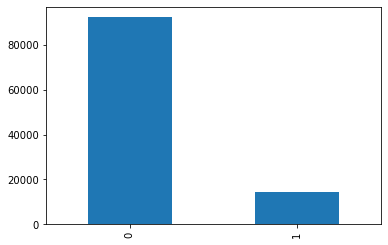

In [53]:
#exploring target variable distribution
gem3['spendtype'].value_counts().plot(kind = 'bar')

In [54]:
# Instantiating LabelEncoder
le = LabelEncoder()
gem3['story'] = le.fit_transform(gem3['story'])

In [55]:
# Splitting Predictor Variables and Target Variable
X = gem3.drop(['spendtype'], axis = 1)
y = gem3['spendtype']

In [56]:
#train-test splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
#checking Train and Test data length
print("Training Data Length: {}".format(len(X_train)))
print("Testing Data Length: {}".format(len(X_test)))

Training Data Length: 85136
Testing Data Length: 21284


In [58]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
#Logistic Regression Model Training
classifier_logreg = LogisticRegression(solver = 'liblinear', random_state = 0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [60]:
#Model Predictions
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
#Evaluating Model Performance
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8715467017477918


In [62]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[18166   315]
 [ 2419   384]]


In [63]:
#Evaluating results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [64]:
#setting dataframce for storing results
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])

In [65]:
#sorting results
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.871547   0.549356  0.136996  0.219303  0.161196


In [66]:
#Cross Validation
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring = 'accuracy')
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores: [0.86645525 0.86785693 0.86961884 0.86838551 0.86879662]
Average cross-validation score: 0.8682226292917111


In [67]:
#Prediction Probability of user's conversion
classifier_logreg.predict_proba(X_test)

array([[0.92451886, 0.07548114],
       [0.51907194, 0.48092806],
       [0.86152259, 0.13847741],
       ...,
       [0.95572805, 0.04427195],
       [0.9318477 , 0.0681523 ],
       [0.92528992, 0.07471008]])

### Comparing with other Classification Algorithms

### K-Nearest Neighbors

In [68]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 22, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [69]:
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

In [70]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [71]:
#storing model results in dataframe
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])

In [72]:
#adding new model results to results dataframe
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1  K-Nearest Neighbours  0.906503   0.708141  0.493400  0.581581  0.525256
0   Logistic Regression  0.871547   0.549356  0.136996  0.219303  0.161196


In [73]:
#Prediction Probability of user's conversion
classifier.predict_proba(X_test)

array([[0.72727273, 0.27272727],
       [0.36363636, 0.63636364],
       [0.81818182, 0.18181818],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.86363636, 0.13636364]])

### Naive Bayes

In [74]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [75]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [76]:
#storing model results in dataframe
model_results = pd.DataFrame([[
'Naive Bayes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])

In [77]:
#appending model results in results dataframe
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.906503   0.708141  0.493400  0.581581  0.525256
2           Naive Bayes  0.906503   0.708141  0.493400  0.581581  0.525256
1   Logistic Regression  0.871547   0.549356  0.136996  0.219303  0.161196


In [85]:
results.reset_index(inplace = True)
results

,index,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,0,K-Nearest Neighbours,0.906503,0.708141,0.493400,0.581581,0.525256
1,1,Naive Bayes,0.906503,0.708141,0.493400,0.581581,0.525256
2,2,Logistic Regression,0.871547,0.549356,0.136996,0.219303,0.161196


In [86]:
#Prediction Probability of user's conversion
classifier.predict_proba(X_test)

array([[2.98647574e-03, 9.97013524e-01],
       [4.15103569e-04, 9.99584896e-01],
       [5.40353713e-03, 9.94596463e-01],
       ...,
       [9.17728476e-02, 9.08227152e-01],
       [6.42585900e-01, 3.57414100e-01],
       [6.15624526e-01, 3.84375474e-01]])

###  Saving Model and Scaling Object

In [ ]:
#saving model and scaling object
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier, file)